In [1]:
! pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 KB 2.0 MB/s eta 0:00:00


In [2]:
from mplsoccer import Pitch, FontManager, Sbopen
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
rcParams['text.color'] = '#c7d5cc'  # set the default text color
import seaborn as sns

In [12]:
from google.colab import drive
drive.mount('/content/drive/')
df_stats = pd.read_excel('/content/SamuCostaVSATMJ17.xlsx')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
mask_complete = df_stats.Evento == "Pase"

In [5]:
mask_not_complete = df_stats.Evento == "Pase fallido"

In [13]:
df_stats

,Equipo,Jugador,Evento,Evento Id,Mins,Secs,X,Y,X2,Y2,Parte,Minuto,Xnueva,Ynueva,X2nueva,Y2nueva
0,Almería,Samú Costa,Pase,1,0,55,44,77,39,86,Primera,0:55,44,23,39,14
1,Almería,Samú Costa,Duelo aéreo,2,0,48,34,62,0,0,Primera,0:48,34,38,0,100
2,Almería,Samú Costa,Pase,3,1,0,32,43,29,65,Primera,1:0,32,57,29,35
3,Almería,Samú Costa,Pase,4,2,8,20,15,16,35,Primera,2:8,20,85,16,65
4,Almería,Samú Costa,Pase fallido,5,2,12,16,13,69,9,Primera,2:12,16,87,69,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Almería,Samú Costa,Duelo aéreo,109,91,26,76,84,0,0,Segunda,91:26,24,84,100,0
109,Almería,Samú Costa,Recuperación,110,91,26,76,84,0,0,Segunda,91:26,24,84,100,0
110,Almería,Samú Costa,Pase,111,92,21,47,67,28,87,Segunda,92:21,53,67,72,87
111,Almería,Samú Costa,Duelo aéreo,112,93,23,87,35,0,0,Segunda,93:23,13,35,100,0


In [15]:
df_stats['Xnueva'] = df_stats['Xnueva'] * 1.2
df_stats['X2nueva'] = df_stats['X2nueva'] * 1.2
df_stats['Ynueva'] = df_stats['Ynueva'] * 0.8
df_stats['Y2nueva'] = df_stats['Y2nueva'] * 0.8

In [14]:
for i in range(len(df_stats.index)):
  if df_stats["Parte"][i] == "Primera":
    df_stats['Ynueva'] = 100 - df_stats['Ynueva']
    df_stats['Y2nueva'] = 100 - df_stats['Y2nueva']
  if df_stats["Parte"][i] == "Segunda":
    df_stats['Xnueva'] = 100 - df_stats['Xnueva']
    df_stats['X2nueva'] = 100 - df_stats['X2nueva']

In [9]:
df_stats

,Equipo,Jugador,Evento,Evento Id,Mins,Secs,X,Y,X2,Y2,Parte,Minuto,Xnueva,Ynueva,X2nueva,Y2nueva
0,Almería,Samú Costa,Pase,1,0,55,44,77,39,86,Primera,0:55,52.8,81.6,46.8,88.8
1,Almería,Samú Costa,Duelo aéreo,2,0,48,34,62,0,0,Primera,0:48,40.8,69.6,0.0,20.0
2,Almería,Samú Costa,Pase,3,1,0,32,43,29,65,Primera,1:0,38.4,54.4,34.8,72.0
3,Almería,Samú Costa,Pase,4,2,8,20,15,16,35,Primera,2:8,24.0,32.0,19.2,48.0
4,Almería,Samú Costa,Pase fallido,5,2,12,16,13,69,9,Primera,2:12,19.2,30.4,82.8,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Almería,Samú Costa,Duelo aéreo,109,91,26,76,84,0,0,Segunda,91:26,28.8,32.8,120.0,100.0
109,Almería,Samú Costa,Recuperación,110,91,26,76,84,0,0,Segunda,91:26,28.8,32.8,120.0,100.0
110,Almería,Samú Costa,Pase,111,92,21,47,67,28,87,Segunda,92:21,63.6,46.4,86.4,30.4
111,Almería,Samú Costa,Duelo aéreo,112,93,23,87,35,0,0,Segunda,93:23,15.6,72.0,120.0,100.0


Text(0.5, 0.8, 'Dirección de ataque')

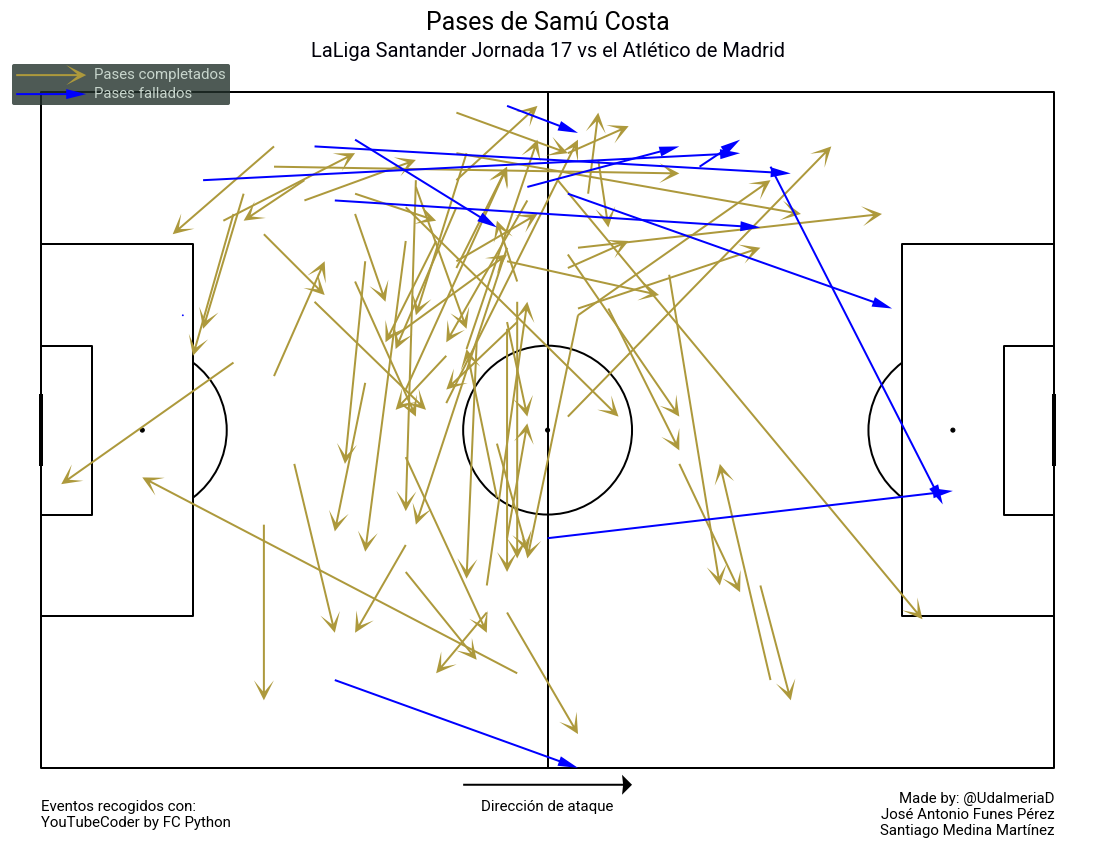

In [16]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0, figheight=12,
                      title_height=0.06, title_space=0, grid_height=0.86,
                      axis=False)
fig.set_facecolor('white')

# Plot the completed passes
pitch.arrows(df_stats[mask_complete].Xnueva, df_stats[mask_complete].Ynueva,
             df_stats[mask_complete].X2nueva, df_stats[mask_complete].Y2nueva, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=axs['pitch'], label='Pases completados')

# Plot the other passes
pitch.arrows(df_stats[mask_not_complete].Xnueva, df_stats[mask_not_complete].Ynueva,
             df_stats[mask_not_complete].X2nueva, df_stats[mask_not_complete].Y2nueva, width=2,
             headwidth=5, headlength=10, headaxislength=10, color='blue', ax=axs['pitch'], label='Pases fallados')

pitch.arrows(50, 82,
             70, 82, width=2,
             headwidth=10, headlength=5, color='black', ax=axs['pitch'])

# fontmanager for Google font (robotto)
robotto_regular = FontManager()

# Set up the legend
legend = axs['pitch'].legend(facecolor='#22312b', handlelength=7, edgecolor='None',
                             prop=robotto_regular.prop, loc='upper left')
for text in legend.get_texts():
    text.set_fontsize(15)

# endnote and title
axs['endnote'].text(1, 0.5, 'Made by: @UdalmeriaD\nJosé Antonio Funes Pérez\nSantiago Medina Martínez', va='center', ha='right', fontsize=12,
                    fontproperties=robotto_regular.prop, color='black')
axs['title'].text(0.5, 0.7, f'Pases de Samú Costa', color='black',
                  va='center', ha='center',
                  fontproperties=robotto_regular.prop, fontsize=25)
axs['title'].text(0.5, 0.15, "LaLiga Santander Jornada 17 vs el Atlético de Madrid", color='#000009',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=20)
axs['endnote'].text(0, 0.5, 'Eventos recogidos con:\nYouTubeCoder by FC Python', va='center', ha='left', fontsize=15,
                    fontproperties=robotto_regular.prop, color='black')
axs['endnote'].text(0.5, 0.8, 'Dirección de ataque', va='center', ha='center', fontsize=10,
                    fontproperties=robotto_regular.prop, color='black')

Text(0.5, 1, 'Dirección de ataque')

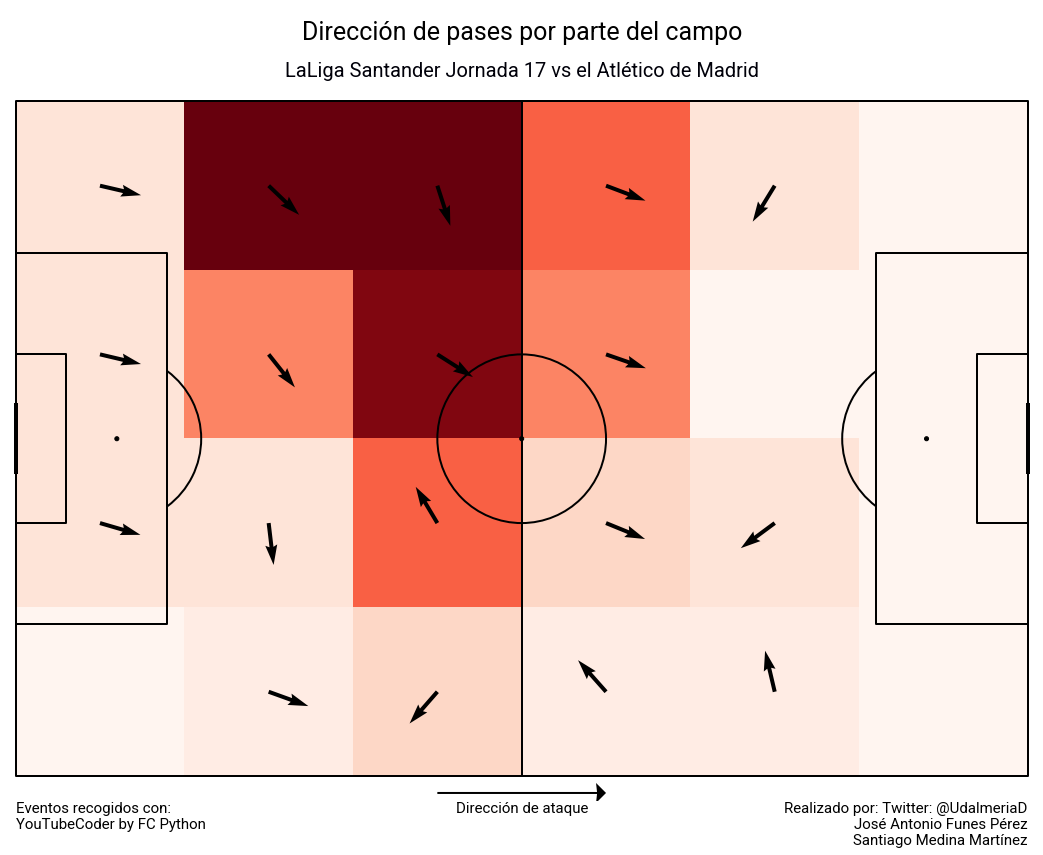

In [17]:
bins = (6, 4)
# We will use mplsoccer's grid function to plot a pitch with a title axis.
pitch = Pitch(pad_bottom=3, pad_top=1,
              pad_left=1, pad_right=1,
              line_zorder=2, line_color='black', pitch_color='white')
fig, axs = pitch.grid(figheight=12, endnote_height=0.03, endnote_space=0,
                      title_height=0.1, title_space=0, grid_height=0.82,
                      axis=False)
fig.set_facecolor('white')

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(df_stats.Xnueva, df_stats.Ynueva, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=axs['pitch'], cmap='Reds') #Blues
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(df_stats.Xnueva, df_stats.Ynueva, df_stats.X2nueva, df_stats.Y2nueva,
                color='black', arrow_type='same',
                arrow_length=5, bins=bins, ax=axs['pitch'])

# title / endnote
font = FontManager()  # default is loading robotto font from google fonts
# endnote and title
axs['endnote'].text(1, 1, 'Realizado por: Twitter: @UdalmeriaD\nJosé Antonio Funes Pérez\nSantiago Medina Martínez', va='top', ha='right', fontsize=12,
                    fontproperties=robotto_regular.prop, color='black')
axs['title'].text(0.5, 0.7, f'Dirección de pases por parte del campo', color='black',
                  va='center', ha='center',
                  fontproperties=robotto_regular.prop, fontsize=25)
axs['title'].text(0.5, 0.25, "LaLiga Santander Jornada 17 vs el Atlético de Madrid", color='#000009',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=20)
axs['endnote'].text(0, 1, 'Eventos recogidos con:\nYouTubeCoder by FC Python', va='top', ha='left', fontsize=15,
                    fontproperties=robotto_regular.prop, color='black')
pitch.arrows(50, 82,
             70, 82, width=2,
             headwidth=10, headlength=5, color='black', ax=axs['pitch'])
axs['endnote'].text(0.5, 1, 'Dirección de ataque', va='top', ha='center', fontsize=10,
                    fontproperties=robotto_regular.prop, color='black')

In [18]:
primera = df_stats[(df_stats['Parte'] == 'Primera')]
segunda = df_stats[(df_stats['Parte'] == 'Segunda')]

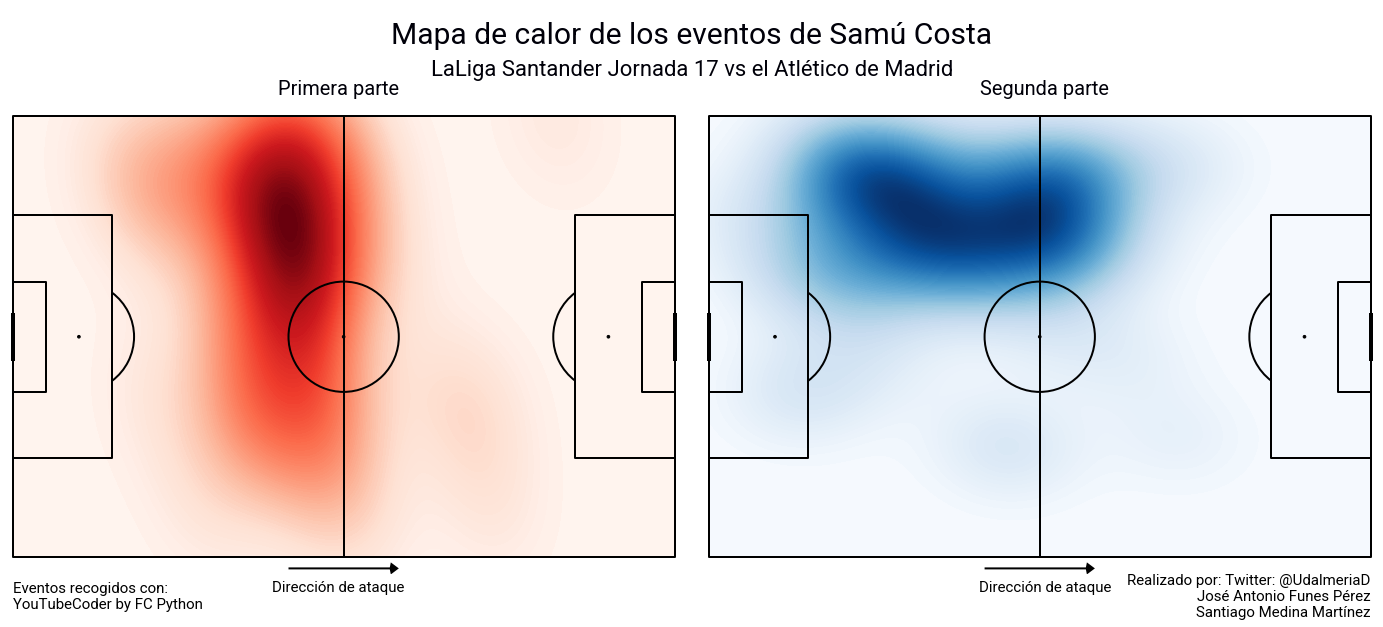

In [19]:
fig, axs = pitch.grid(ncols=2, axis=False, endnote_height=0.05)

kde_before = pitch.kdeplot(primera.Xnueva, primera.Ynueva, ax=axs['pitch'][0],
                           fill=True, levels=100, shade_lowest=True,
                           cut=4, cmap='Reds')

kde_after = pitch.kdeplot(segunda.Xnueva, segunda.Ynueva, ax=axs['pitch'][1],
                          fill=True, levels=100, shade_lowest=True,
                          cut=4, cmap='Blues')

# titles using highlight_text and a google font (Robotto)
axs['endnote'].text(1, 0.5, 'Realizado por: Twitter: @UdalmeriaD\nJosé Antonio Funes Pérez\nSantiago Medina Martínez', va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop, color='black')
axs['endnote'].text(0, 0.5, 'Eventos recogidos con:\nYouTubeCoder by FC Python', va='center', ha='left', fontsize=15,
                    fontproperties=robotto_regular.prop, color='black')
axs['title'].text(0.5, 0.7, "Mapa de calor de los eventos de Samú Costa", color='#000009',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=30)
axs['title'].text(0.5, 0.35, "LaLiga Santander Jornada 17 vs el Atlético de Madrid", color='#000009',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=22)
axs['title'].text(0.24, 0.15, "Primera parte", color='#000009',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=20)
axs['title'].text(0.76, 0.15, "Segunda parte", color='#000009',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=20)
pitch.arrows(50, 82, 70, 82, width=2, headwidth=6, headlength=4, color='black', ax=axs['pitch'][0])
pitch.arrows(50, 82, 70, 82, width=2, headwidth=6, headlength=4, color='black', ax=axs['pitch'][1])
axs['endnote'].text(0.76, 1, 'Dirección de ataque', va='top', ha='center', fontsize=10,
                    fontproperties=robotto_regular.prop, color='black')
axs['endnote'].text(0.24, 1, 'Dirección de ataque', va='top', ha='center', fontsize=10,
                    fontproperties=robotto_regular.prop, color='black')
plt.show()  # If you are using a Jupyter notebook you do not need this line

In [20]:
otros = df_stats[(df_stats['Evento'] != 'Pase') & (df_stats['Evento'] != 'Pase fallido')]
otros.reset_index()

,index,Equipo,Jugador,Evento,Evento Id,Mins,Secs,X,Y,X2,Y2,Parte,Minuto,Xnueva,Ynueva,X2nueva,Y2nueva
0,1,Almería,Samú Costa,Duelo aéreo,2,0,48,34,62,0,0,Primera,0:48,40.8,49.6,0.0,0.0
1,9,Almería,Samú Costa,Recuperación,10,11,37,46,67,0,0,Primera,11:37,55.2,53.6,0.0,0.0
2,13,Almería,Samú Costa,Duelo aéreo,14,20,9,41,34,0,0,Primera,20:9,49.2,27.2,0.0,0.0
3,14,Almería,Samú Costa,Entrada,15,20,17,43,1,0,0,Primera,20:17,51.6,0.8,0.0,0.0
4,18,Almería,Samú Costa,Duelo aéreo,19,21,34,45,48,0,0,Primera,21:34,54.0,38.4,0.0,0.0
5,28,Almería,Samú Costa,Recuperación,29,29,30,82,0,0,0,Primera,29:30,98.4,0.0,0.0,0.0
6,29,Almería,Samú Costa,Duelo aéreo,30,32,58,46,10,0,0,Primera,32:58,55.2,8.0,0.0,0.0
7,32,Almería,Samú Costa,Recuperación,33,35,33,36,17,0,0,Primera,35:33,43.2,13.6,0.0,0.0
8,35,Almería,Samú Costa,Duelo aéreo,36,36,1,65,64,0,0,Primera,36:1,78.0,51.2,0.0,0.0
9,41,Almería,Samú Costa,Recuperación,42,43,19,37,74,0,0,Primera,43:19,44.4,59.2,0.0,0.0


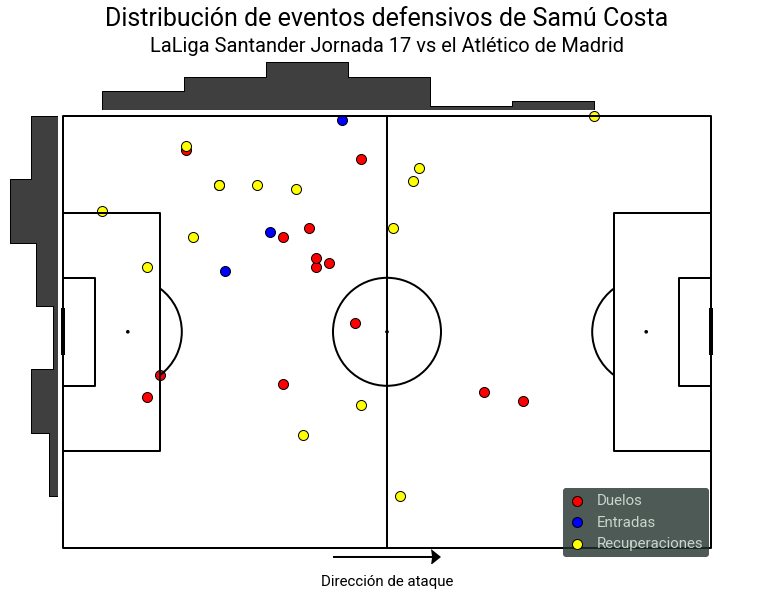

In [39]:
fm = FontManager()
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
                       'RubikMonoOne-Regular.ttf')
fig, axs = pitch.jointgrid(figheight=10,  # the figure is 10 inches high
                           left=None,  # joint grid center-aligned
                           bottom=0.075,  # grid starts 7.5% in from the bottom of the figure
                           marginal=0.1,  # marginal axes heights are 10% of grid height
                           space=0,  # 0% of the grid height reserved for space between axes
                           grid_width=0.8,  # the grid width takes up 90% of the figure width
                           title_height=0,  # plot without a title axes
                           axis=False,  # turn off title/ endnote/ marginal axes
                           endnote_height=0,  # plot without an endnote axes
                           grid_height=0.7)  # grid takes up 80% of the figure height
# we plot a usual scatter plot but the scatter size is based on expected goals
# note that the size is the expected goals * 700
# so any shots with an expected goals = 1 would take a size of 700 (points**2)
duelos = otros[(otros['Evento'] == 'Duelo aéreo')]
entradas = otros[(otros['Evento'] == 'Entrada')]
recuperaciones = otros[(otros['Evento'] == 'Recuperación')]
sc_duelos = pitch.scatter(duelos.Xnueva, duelos.Ynueva, s=100,
                         ec='black', color='red', ax=axs['pitch'], label='Duelos')
sc_entradas = pitch.scatter(entradas.Xnueva, entradas.Ynueva, s=100,
                         ec='black', color='blue', ax=axs['pitch'], label='Entradas')
sc_recuperaciones = pitch.scatter(recuperaciones.Xnueva, recuperaciones.Ynueva, s=100,
                         ec='black', color='yellow', ax=axs['pitch'], label='Recuperaciones')
# (step) histograms on each of the left, top, and right marginal axes
team1_hist_y = sns.histplot(y=otros.Ynueva, ax=axs['left'], element='step', color='black')
team1_hist_x = sns.histplot(x=otros.Xnueva, ax=axs['top'], element='step', color='black')
txt1 = axs['pitch'].text(x=60, y=-18, s='Distribución de eventos defensivos de Samú Costa', fontproperties=robotto_regular.prop, color='black', ha='center', va='center', fontsize=25)
txt2 = axs['pitch'].text(x=60, y=-13, s='LaLiga Santander Jornada 17 vs el Atlético de Madrid', fontproperties=robotto_regular.prop, color='black', ha='center', va='center', fontsize=20)

legend = axs['pitch'].legend(facecolor='#22312b', handlelength=1, edgecolor='None',
                             prop=robotto_regular.prop, loc='lower right')

for text in legend.get_texts():
    text.set_fontsize(15)

pitch.arrows(50, 81.7, 70, 81.7, width=2, headwidth=8, headlength=5, color='black', ax=axs['pitch'])
txt3 = axs['pitch'].text(x=60, y=85, s='Dirección de ataque', va='top', ha='center', fontsize=10, fontproperties=robotto_regular.prop, color='black')

